In [1]:
#IMPORTS
#! pip install tensorflow
import pandas as pd
import numpy as np 

import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras import Model

2022-05-19 07:45:28.446556: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-19 07:45:28.446585: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


## 1.Data loading.

In [2]:
url='https://humor-detection-pds.s3-us-west-2.amazonaws.com/Humorous.csv'

url1='https://humor-detection-pds.s3-us-west-2.amazonaws.com/Non-humours-biased.csv'

url2='https://humor-detection-pds.s3-us-west-2.amazonaws.com/Non-humorous-unbiased.csv'

#reading the datasets
def read (data):
  return pd.read_csv(data)

humorous=read(url)

biased=read(url1)

unbiased=read(url2)



In [3]:
#previewing the datasets
#dataset1 first 5 rows
humorous.head()

,question,product_description,image_url,label
0,Will the volca sample get me a girlfriend?,Korg Amplifier Part VOLCASAMPLE,http://ecx.images-amazon.com/images/I/81I1XZea...,1
1,Can u communicate with spirits even on Saturday?,Winning Moves Games Classic Ouija,http://ecx.images-amazon.com/images/I/81kcYEG5...,1
2,I won't get hunted right?,Winning Moves Games Classic Ouija,http://ecx.images-amazon.com/images/I/81kcYEG5...,1
3,I have a few questions.. Can you get possessed...,Winning Moves Games Classic Ouija,http://ecx.images-amazon.com/images/I/81kcYEG5...,1
4,Has anyone asked where the treasure is? What w...,Winning Moves Games Classic Ouija,http://ecx.images-amazon.com/images/I/81kcYEG5...,1


In [4]:
#dataset1 the last 5 rows
humorous.tail()

,question,product_description,image_url,label
9566,l need the ruber well nut for replacement,Puig 5051F Dark Smoke New Generation Windshield,http://ecx.images-amazon.com/images/I/71cuiSDy...,1
9567,can this pc cure cancer,SkyTech Supremacy Gaming Computer PC Desktop -...,http://ecx.images-amazon.com/images/I/91lPP0C9...,1
9568,Is tgis the product back on shark tank?,Rapid Tone Ultra Weight Loss Supplement - Extr...,http://ecx.images-amazon.com/images/I/71s+DyOu...,1
9569,any one else try? is it as good as they said o...,Essence PH Skin Cream 0.5 fl oz/15ml,http://ecx.images-amazon.com/images/I/41-nA6Ot...,1
9570,Is this brush set made with animal furs at all...,10 Piece Kabuki Contouring Makeup Brush Set wi...,http://ecx.images-amazon.com/images/I/713bRd40...,1


In [5]:
#dataset2 first 5 rows
biased.head()

,question,product_description,image_url,label
0,What is the size range of these patterns,The Colette Sewing Handbook: 5 Fundamentals fo...,https://www.amazon.co.uk/ask/questions/Tx355VH...,0
1,Are the instructions in uk or us terms?,Absolutely Gorgeous Doilies,https://www.amazon.co.uk/ask/questions/Tx3IRRI...,0
2,Is this manual good for 2014 model c3,Citroen C3 Petrol & Diesel Service and Repair ...,https://www.amazon.co.uk/ask/questions/Tx3S1FO...,0
3,Hello does the light have adjustable brightness?,Mighty Bright Blue Xtraflex 2 LED Book Light,https://www.amazon.co.uk/ask/questions/Tx38TXK...,0
4,Will these inks work with the wf-7720dtwf model?,24 High Capacity ink cartridge to Replace 27XX...,https://www.amazon.co.uk/ask/questions/Tx1IVEI...,0


In [6]:
#dataset2 the last 5 rows
biased.tail()

,question,product_description,image_url,label
9566,Does the 68lm 6 inch give an audible alarm if ...,Garmin Nuvi 68LM 6 inch Satellite Navigation w...,https://www.amazon.co.uk/ask/questions/Tx1IVDN...,0
9567,Do you need 2 phone sockets / connection boxes...,iDECT Eclipse Plus Dect Phone with Call Blocke...,https://www.amazon.co.uk/ask/questions/TxI4UJL...,0
9568,I buy it on 05.11.2015 and today my usb device...,SanDisk SDCZ43-128G-G46 Ultra Fit 128 GB USB F...,https://www.amazon.co.uk/ask/questions/Tx3ORN8...,0
9569,Hi What is the warranty period on this? I noti...,SanDisk SDCZ43-128G-G46 Ultra Fit 128 GB USB F...,https://www.amazon.co.uk/ask/questions/Tx3AM5L...,0
9570,can you use proper golf balls,Haack Golf Net By SEC Coach Chris Haack by Rukket,https://www.amazon.co.uk/ask/questions/Tx2NNFV...,0


In [7]:
#dataset3 first 5 rows
unbiased.head()

,question,product_description,image_url,label
0,Is AudioPocket only for iPhone (recording soun...,Korg Amplifier Part VOLCASAMPLE,http://ecx.images-amazon.com/images/I/81I1XZea...,0
1,Standard shipping takes how long?,Winning Moves Games Classic Ouija,http://ecx.images-amazon.com/images/I/81kcYEG5...,0
2,Can I use this my self?,Winning Moves Games Classic Ouija,http://ecx.images-amazon.com/images/I/81kcYEG5...,0
3,If the felt comes off the guide can I return i...,Winning Moves Games Classic Ouija,http://ecx.images-amazon.com/images/I/81kcYEG5...,0
4,Does it acually work?,Winning Moves Games Classic Ouija,http://ecx.images-amazon.com/images/I/81kcYEG5...,0


In [8]:
#dataset3 the last 5 rows
unbiased.tail()

,question,product_description,image_url,label
9566,Serve na f800r 2013?,Puig 5051F Dark Smoke New Generation Windshield,http://ecx.images-amazon.com/images/I/71cuiSDy...,0
9567,Can it run mine sweeper abve 10 fps?,SkyTech Supremacy Gaming Computer PC Desktop -...,http://ecx.images-amazon.com/images/I/91lPP0C9...,0
9568,What is the difference between the pro weight ...,Rapid Tone Ultra Weight Loss Supplement - Extr...,http://ecx.images-amazon.com/images/I/71s+DyOu...,0
9569,Can you provide me a phone number to the compa...,Essence PH Skin Cream 0.5 fl oz/15ml,http://ecx.images-amazon.com/images/I/41-nA6Ot...,0
9570,Is the blenders sponge latex free?,10 Piece Kabuki Contouring Makeup Brush Set wi...,http://ecx.images-amazon.com/images/I/713bRd40...,0


## 2.Combining the datasets.

In [9]:
#defining the function to combine the datasets

def combine  (df1,df2):
  return pd.concat([df1,df2], ignore_index=True, axis=0)
  
data1= combine(humorous, biased)
#Combine data1 and unbiased dataset
data2=combine(data1, unbiased)
#preview the combined data
data2.head(4)





,question,product_description,image_url,label
0,Will the volca sample get me a girlfriend?,Korg Amplifier Part VOLCASAMPLE,http://ecx.images-amazon.com/images/I/81I1XZea...,1
1,Can u communicate with spirits even on Saturday?,Winning Moves Games Classic Ouija,http://ecx.images-amazon.com/images/I/81kcYEG5...,1
2,I won't get hunted right?,Winning Moves Games Classic Ouija,http://ecx.images-amazon.com/images/I/81kcYEG5...,1
3,I have a few questions.. Can you get possessed...,Winning Moves Games Classic Ouija,http://ecx.images-amazon.com/images/I/81kcYEG5...,1


In [10]:
#Shaffle the data2
from sklearn.utils import shuffle
df = shuffle(data2).reset_index()


## 3.Checking the data.

In [11]:
#Drop the index
df.drop(['index'], axis=1, inplace=True)

In [12]:
#Preview the top of the data
df.head()

,question,product_description,image_url,label
0,can you put a scope on this,Rogue River Tactical 80lbs 80 Pound Pistol Cro...,http://ecx.images-amazon.com/images/I/716WjyAj...,0
1,Does it moves?,Winning Moves Games Classic Ouija,http://ecx.images-amazon.com/images/I/81kcYEG5...,1
2,What touch-less flush valves are compatible wi...,KOHLER 5244-ET-0 Steward Hybrid High-Efficienc...,http://ecx.images-amazon.com/images/I/61tpLrcj...,0
3,Does this come with my father? He said hes goi...,Roblox Work at a Pizza Place Game Pack,http://ecx.images-amazon.com/images/I/71BxCdvA...,1
4,Will i fail no nut november if i listen to mus...,Devialet Gold Phantom - High-end wireless spea...,http://ecx.images-amazon.com/images/I/51P05w2s...,1


In [13]:
#Preview the bottom of the data
df.tail()

,question,product_description,image_url,label
28708,Does this cream have any SPF?,St Ives Collagen Elastin Face Moisturizer Time...,https://www.amazon.co.uk/ask/questions/Tx2HIFO...,0
28709,Is this duck BPA free?,Munchkin White Hot Safety Bath Ducky,http://ecx.images-amazon.com/images/I/8166xCVD...,0
28710,what is the exact dimensions of this shoe rack...,woodluv 3 Tier Natural Bamboo Shoe Rack Storag...,https://www.amazon.co.uk/ask/questions/Tx3IDH9...,0
28711,When i try to activate the software i am getti...,Microsoft Office Home and Student 2013 - licence,https://www.amazon.co.uk/ask/questions/TxLTYWD...,0
28712,Does the watch work?,Silver Plated Q&Q Fashion Vintage Fairytale Ch...,http://ecx.images-amazon.com/images/I/61NK0J4Q...,0


In [14]:
#check the data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28713 entries, 0 to 28712
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   question             28713 non-null  object
 1   product_description  28665 non-null  object
 2   image_url            28031 non-null  object
 3   label                28713 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 897.4+ KB


The datasets has atotal of 28713 customer inquiries and four columns.

In [15]:
#Describe the data
# Printing the unique values
columns = df.columns
for i in columns:
  print('Unique values in', i , 'are :')
  print(df[i].unique())
  print('number of unique values',len(df[i].unique()))
  print('                                                                           ')
  print('***************************************************************************')

Unique values in question are :
['can you put a scope on this' 'Does it moves?'
 'What touch-less flush valves are compatible with this .125 gpf urinal bowl? would not like an overflow situation.'
 ...
 'what is the exact dimensions of this shoe rack? There are conflicting info on the page'
 'When i try to activate the software i am getting a message saying that the product key is not valid in my region. have i been sent the wrong product?'
 'Does the watch work?']
number of unique values 27916
                                                                           
***************************************************************************
Unique values in product_description are :
['Rogue River Tactical 80lbs 80 Pound Pistol Crossbow with Arrow Holder w/27 Cross Bow Bolts Arrows ... ...'
 'Winning Moves Games Classic Ouija'
 'KOHLER 5244-ET-0 Steward Hybrid High-Efficiency Urinal with 3/4" Top Spud White'
 ...
 'St Ives Collagen Elastin Face Moisturizer Timeless Skin 10 oz. Jar (3

From the above results, the number of products is 12686.

## Data cleaning.

In [16]:
#Check the missing values in the dataset
df.isnull().sum()

question                 0
product_description     48
image_url              682
label                    0
dtype: int64

The column with missing values are the column of product description and the column of image-url. The other columns of question and label doesn't contain any missing values.

In [17]:
#Dealing with missing values
#The missing values column would be dropped as they are irrellevant in the modelling.
df.drop(['product_description', 'image_url'], axis=1, inplace=True)

In [18]:
#Checking and drop the duplicates
duplicate=df[df.duplicated()]
#preview the duplicated
duplicate.value_counts()


question                                                                                label
Does the girl come with it?                                                             1        15
Where is it made?                                                                       0        13
Does it come with the girl?                                                             1        12
Where is this made?                                                                     0        11
How big is it?                                                                          0         8
                                                                                                 ..
How many of these to build a 360 degree set up?                                         0         1
How many mg of Caffeine is in each can?                                                 0         1
How many did you eat and how soon after eating did you have your instestinal exorcism?  1         1
How ma

In [19]:
#Drop the duplicates
df.drop_duplicates(inplace=True)

## Preprocessing.

In [20]:
#Removing punctuations
df['question'] = df['question'].str.replace('[^\w\s]', '')

/tmp/ipykernel_27852/1056049218.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['question'] = df['question'].str.replace('[^\w\s]', '')


From the above code, the punctuations marks was dropped, as part of preprocessing the data, since they're of know use.

In [21]:
#Change the the characters in the question to lower case
# .lower()
df['question']= df['question'].apply(lambda x: x.lower())

The code above converts the characters in the question columns to lower case.

In [22]:
#Make  acopy to be used in sentiment analysis
df_copy=df.copy()

In [23]:
#Tokenization of the texts
! pip install transformers
from transformers import AutoTokenizer
tokenizer=AutoTokenizer.from_pretrained('bert-base-uncased')

In [24]:
df.dtypes

question    object
label        int64
dtype: object

In [25]:
#NLTK the the words
! pip install nltk
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
df['question'] = df['question'].apply(nltk.word_tokenize)
# df['question']= word_tokenize(df['question'])
df.head

[nltk_data] Downloading package punkt to /home/mirana/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


<bound method NDFrame.head of                                                 question  label
0                    [can, you, put, a, scope, on, this]      0
1                                      [does, it, moves]      1
2      [what, touchless, flush, valves, are, compatib...      0
3      [does, this, come, with, my, father, he, said,...      1
4      [will, i, fail, no, nut, november, if, i, list...      1
...                                                  ...    ...
28708                [does, this, cream, have, any, spf]      0
28709                        [is, this, duck, bpa, free]      0
28710  [what, is, the, exact, dimensions, of, this, s...      0
28711  [when, i, try, to, activate, the, software, i,...      0
28712                           [does, the, watch, work]      0

[27930 rows x 2 columns]>

In [26]:
#Remove stop words
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')
#defining the function to remove stopwords from tokenized text
def remove_stopwords(text):
    output= [i for i in text if i not in stopwords]
    return output

[nltk_data] Downloading package stopwords to /home/mirana/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [27]:
#applying the function
df['question']= df['question'].apply(lambda x:remove_stopwords(x))

In [28]:
#Lemmatization
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
#defining the object for Lemmatization
wordnet_lemmatizer = WordNetLemmatizer()
#defining the function for lemmatization
def lemmatizer(text):
    lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
    return lemm_text

df['question']=df['question'].apply(lambda x:lemmatizer(x)) 



[nltk_data] Downloading package wordnet to /home/mirana/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [29]:
#Import tensor flow library
import tensorflow as tf
#Import tokenizer for converting words to numerical form
from tensorflow.keras.preprocessing.text import Tokenizer
# converting  sentences into max_length format by adding zeros 
from tensorflow.keras.preprocessing.sequence import pad_sequences 

In [30]:
#Initializing variables for the model
vocab_size = 10000
embedding_dim = 16 #
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000

In [31]:
#Convert data to json formart
import json
df.to_json(r'/home/mirana/Downloads/group 5/Name.json', orient="records")
with open("Name.json", 'r') as f:
    data = json.load(f)
data


[{'question': ['put', 'scope'], 'label': 0},
 {'question': ['move'], 'label': 1},
 {'question': ['touchless',
   'flush',
   'valve',
   'compatible',
   '125',
   'gpf',
   'urinal',
   'bowl',
   'would',
   'like',
   'overflow',
   'situation'],
  'label': 0},
 {'question': ['come',
   'father',
   'said',
   'he',
   'going',
   'pizza',
   '15',
   'year',
   'ago',
   'wandering'],
  'label': 1},
 {'question': ['fail', 'nut', 'november', 'listen', 'music', 'product'],
  'label': 1},
 {'question': ['come'], 'label': 1},
 {'question': ['wand', 'work', 'universal', 'studio'], 'label': 1},
 {'question': ['used', 'normal', 'desktop', 'use', 'storage'], 'label': 0},
 {'question': ['make',
   'dashboard',
   'mohammed',
   'sure',
   'thousand',
   'would',
   'sold',
   'charlie',
   'hebdo',
   'sold',
   '7',
   'million',
   'copy',
   'mohammed'],
  'label': 0},
 {'question': ['damascus', 'steel'], 'label': 0},
 {'question': ['camera',
   'spec',
   'others',
   '5',
   '13',
   '

In [32]:
questions = []
labels = []

for item in data:
    questions.append(item["question"])
    labels.append(item["label"])


In [33]:
#Split the data into train and test
training_questions = questions[0:training_size]
testing_questions = questions[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]



In [34]:
#Tokenizing data
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_questions)

word_index = tokenizer.word_index
#Sequencing and padding the data
training_sequences = tokenizer.texts_to_sequences(training_questions)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_questions)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
testing_sequences

[[47, 1230, 1021, 447, 5, 684, 383, 50, 1501, 383, 84, 322, 1127, 18, 1854],
 [486, 5, 3915],
 [113, 556, 1],
 [112, 965, 132],
 [46, 31, 685, 142, 111],
 [687, 1804, 687, 1804, 3156, 138, 269, 1, 285, 1],
 [308, 710],
 [24, 1878, 818, 241, 37],
 [350, 2, 984],
 [332, 229, 37, 229, 2756, 395, 164, 318, 1186, 229],
 [372, 374, 162],
 [10, 2883, 64, 88, 1414, 5, 35, 35],
 [1386, 73],
 [47, 8682, 84, 8682],
 [989, 299, 1509, 735, 15, 70, 956, 373, 466, 311, 735, 1509],
 [164, 1007, 2468, 1749, 224, 193],
 [5, 232, 11, 1305, 161],
 [448, 1202, 45, 3, 45, 618],
 [2, 1485, 36],
 [2075, 10, 1115, 513, 6729, 10, 50, 686, 1115, 209, 2597, 383, 1393],
 [856, 1004, 1004, 37, 1004, 3, 26, 1004],
 [11, 67, 2],
 [1],
 [60],
 [1645, 268, 377, 570],
 [29, 150, 153, 4, 219],
 [214, 97, 416],
 [1126, 321, 8, 912, 81, 3, 1688, 1979],
 [236, 1168, 203, 2636, 136, 1087, 10, 529, 1, 52, 91, 2646, 408, 52],
 [9348, 87, 36, 45, 8, 20, 625, 5787],
 [481, 23, 214, 12, 39, 49, 7, 294, 1],
 [866, 726, 8481, 815],

In [35]:
#Convert the padded train and tests into number arrays
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [36]:
#Building the model 
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

2022-05-19 07:48:35.220152: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-19 07:48:35.220750: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-19 07:48:35.220855: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-05-19 07:48:35.220946: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-05-19 07:48:35.221051: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

In [37]:
#Compile the model
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [38]:
#Model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           160000    
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 24)                408       
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [39]:
#Fitting our model to the training data
num_epochs = 20
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/20
625/625 - 5s - loss: 0.6383 - accuracy: 0.6639 - val_loss: 0.6181 - val_accuracy: 0.6794 - 5s/epoch - 7ms/step
Epoch 2/20
625/625 - 2s - loss: 0.5878 - accuracy: 0.6735 - val_loss: 0.5252 - val_accuracy: 0.7048 - 2s/epoch - 4ms/step
Epoch 3/20
625/625 - 2s - loss: 0.4495 - accuracy: 0.7994 - val_loss: 0.4085 - val_accuracy: 0.8339 - 2s/epoch - 4ms/step
Epoch 4/20
625/625 - 2s - loss: 0.3563 - accuracy: 0.8554 - val_loss: 0.3666 - val_accuracy: 0.8435 - 2s/epoch - 4ms/step
Epoch 5/20
625/625 - 2s - loss: 0.3149 - accuracy: 0.8706 - val_loss: 0.3603 - val_accuracy: 0.8450 - 2s/epoch - 4ms/step
Epoch 6/20
625/625 - 2s - loss: 0.2877 - accuracy: 0.8827 - val_loss: 0.3484 - val_accuracy: 0.8518 - 2s/epoch - 4ms/step
Epoch 7/20
625/625 - 2s - loss: 0.2672 - accuracy: 0.8931 - val_loss: 0.3505 - val_accuracy: 0.8499 - 2s/epoch - 4ms/step
Epoch 8/20
625/625 - 2s - loss: 0.2514 - accuracy: 0.8988 - val_loss: 0.3565 - val_accuracy: 0.8499 - 2s/epoch - 3ms/step
Epoch 9/20
625/625 - 2s 

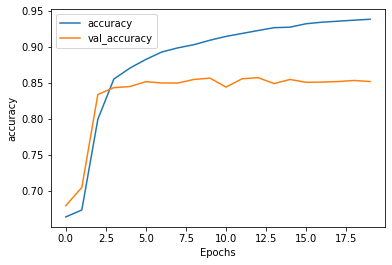

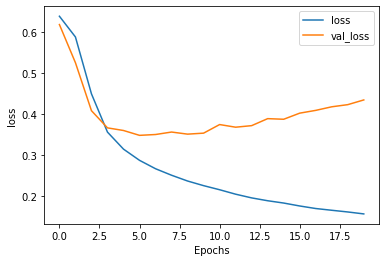

In [40]:
#Visualization
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [41]:
# pickling the model
import pickle
pickle_out = open("classifier.pkl", "wb")
pickle.dump(model, pickle_out)
pickle_out.close()

INFO:tensorflow:Assets written to: ram://945b629e-318b-4f32-a150-97c8930ae6e3/assets


In [ ]:
cc()))

## Sentiment analysis

In [42]:
#Sentiment Analysis
from transformers import pipeline
classifier = pipeline('sentiment-analysis') 
results = classifier(list(df_copy['question']))
results

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)


KeyboardInterrupt: 

In [ ]:
#Get sentiment list and apppend into a new sentiment column.
sents = []
scores=[]
for pair in results:
  for key, value in pair.items():
    sents.append(value)

for val in sents:

  if type(val) == float:
    scores.append(val)
    sents.remove(val)  
sents
df_copy['sentiment'] = sents

: 

: 

In [ ]:
# count of positive and negative sentiments
import matplotlib.pyplot as plt

df_copy['sentiment'].value_counts().plot.bar()
plt.title('Sentiment Counts')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
plt.show()

: 

: 

In [ ]:
#Preview
df_copy.head(3)

: 

: 

In [ ]:
#Convert the scores into array
scores=np.array(scores)
#Calculate the of scores
np.mean(scores)

: 

: 

Our sentiment analysis model has an average accuracy of 95.24%.

## Feature Engineering.

In [ ]:
#Feature engineering
zero_shot = pipeline('zero-shot-classification')

: 

: 

In [ ]:
#Create product evaluation metric classes
zero_shot = pipeline('zero-shot-classification')
input_text =list(df_copy['question'])
candidate_labels = ['quality', 'price', 'quantity', 'delivery', 'service', 'location']
zero_shot(input_text, candidate_labels)

: 

: 